# Day 2 – Multiple Linear & Polynomial Regression 

Today, we explore what happens when one input isn't enough or when the relationship isn't strictly linear.

Today, we'll see what happens when one input isn't enough or when a relationship isn't a straight line. This notebook demonstrates how to build a multiple linear regression model to use several predictors at once, and then how to use polynomial terms to capture curved patterns in the data.

## Load the Data

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Load data
mission_df = pd.read_csv("/Users/amrithaa/Downloads/12DayDataSeries/notebooks/data/mission_data.csv")
mission_df.head()


# Drop empty values
df_copy = mission_df.dropna(subset=['mental_health_score', 'distance_to_target_km', 'payload_mass_kg']).copy()


## Part 1. Multilinear Regression

On Day 1, we saw that using a single feature like `mental_health_score` gave us a moderate model to predict mission score. 

Let's see how much better we can do by adding more relevant predictors. We'll start with two features that could intuitively impact success linearly: fuel_capacity and solar_flare_risk.

In [207]:
# 1. Select multiple features
features_multi = ['distance_to_target_km',
    'mission_duration_days']
X = df_copy[features_multi]
y = df_copy["fuel_capacity_kg"]

# 2. Fit the model
multi_reg = LinearRegression()
multi_reg.fit(X, y)
y_pred = multi_reg.predict(X)

# 3. Evaluate and show coefficients
    
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

print("\nCoefficients:")
for feat, coef in zip(features_multi, multi_reg.coef_):
    print(f"- {feat}: {coef:.3f}")

MSE: 9743.509
RMSE: 98.709
R² Score: 0.941

Coefficients:
- distance_to_target_km: 0.975
- mission_duration_days: 0.585


## Part 2. Polynomial Regression

In [208]:
x = df_copy[["mental_health_score"]].values
y_poly = df_copy["mission_success_score"]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(x)

polymodel = LinearRegression()
polymodel.fit(X_poly, y_poly)
y_poly_pred = polymodel.predict(X_poly)

poly_mse = mean_squared_error(y_poly, y_poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_r2 = r2_score(y_poly, y_poly_pred)

print(f"Polynomial MSE: {poly_mse:.2f}")
print(f"Polynomial RMSE: {poly_rmse:.2f}")
print(f"Polynomial R² Score: {poly_r2:.2f}")

Polynomial MSE: 32.76
Polynomial RMSE: 5.72
Polynomial R² Score: 0.68


## Visualize Actual vs Predicted for Multi-Linear & Polynomial Regression 

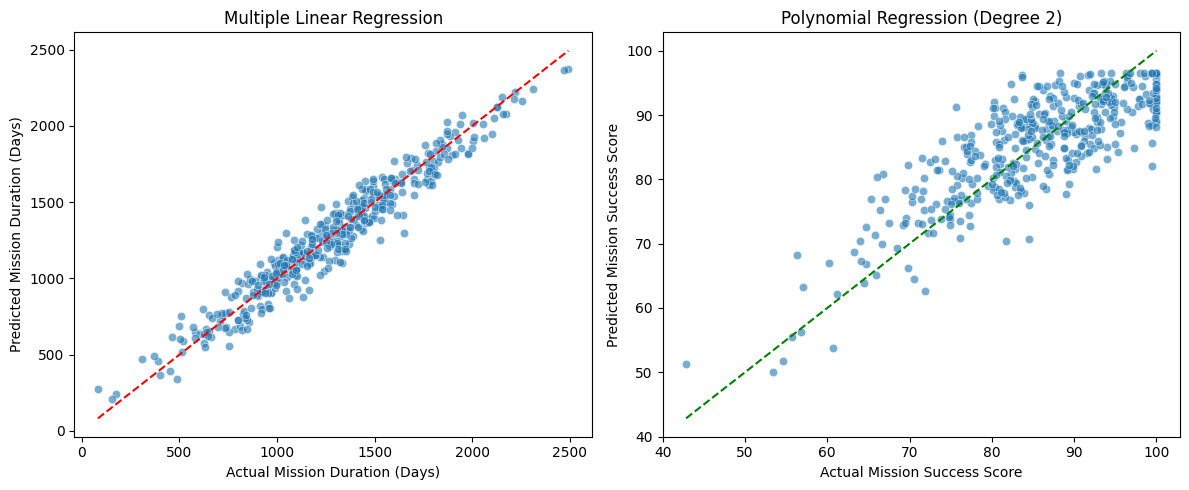

In [209]:
plt.figure(figsize=(12, 5))

# Multi-linear regression plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Mission Duration (Days)")
plt.ylabel("Predicted Mission Duration (Days)")
plt.title("Multiple Linear Regression")

# Polynomial regression plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_poly, y=y_poly_pred, alpha=0.6)
plt.plot([y_poly.min(), y_poly.max()], [y_poly.min(), y_poly.max()], 'g--')
plt.xlabel("Actual Mission Success Score")
plt.ylabel("Predicted Mission Success Score")
plt.title("Polynomial Regression (Degree 2)")

plt.tight_layout()
plt.show()

### What this tells us

Using **multiple features** helped the model capture more of the variation in mission success. Polynomial regression gave the model more flexibility — letting it capture subtle, nonlinear patterns in the data.

- Positive coefficients suggest a direct relationship (e.g., longer distances → higher fuel capacity)
- Negative ones suggest inverse relationships.

Even with polynomial terms, we have to be cautious: overfitting is a risk, and interpretation gets harder as complexity increases. More on that, later.

**Takeaway:** When relationships aren’t linear — try curves. Polynomial regression gives you that power.

📌 Next up: **Day 3 – Feature Engineering & Multilinear Modeling Techniques**
